In [6]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import numpy as np
import time
import matplotlib.pyplot as plt

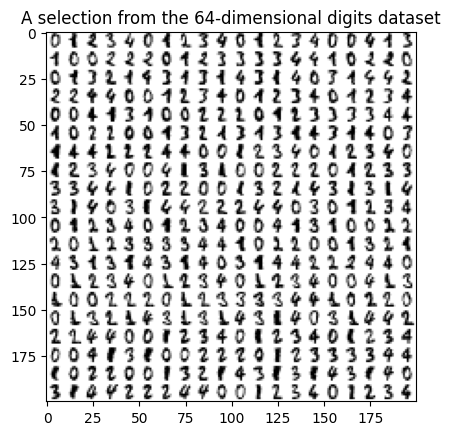

In [3]:
digits = load_digits(n_class=5)
X = digits.data
y = digits.target
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))
        plt.imshow(img, cmap=plt.cm.binary)
        plt.title('A selection from the 64-dimensional digits dataset')

In [4]:
def plot_embedding_3d(X, title=None):
    #坐标缩放到[0,1]区间
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)
    #降维后的坐标为（X[i, 0], X[i, 1],X[i,2]），在该位置画出对应的digits
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1], X[i, 2], str(digits.target[i]), color=plt.cm.Set1(y[i] / 10.),
                fontdict={'weight': 'bold', 'size': 9})
        if title is not None:
            plt.title(title)

Computing t-SNE embedding


D:\Anaconda3\envs\dl_base\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
D:\Anaconda3\envs\dl_base\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


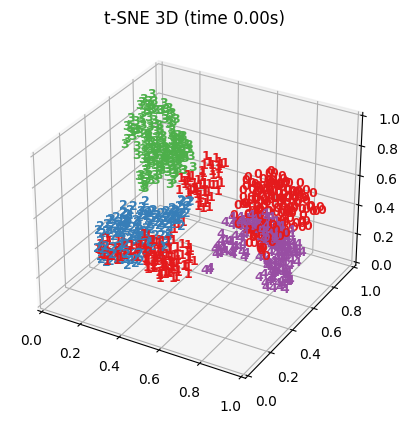

In [7]:
print("Computing t-SNE embedding")
tsne = TSNE(n_components=3, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)
t0 = time.time()
plot_embedding_3d(X_tsne, "t-SNE 3D (time %.2fs)" % (time.time() - t0))